In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
messages= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/NLP/spam.csv',encoding='latin-1')


In [0]:
df=pd.DataFrame()
df[['message','label']]=messages[['v2','v1']]

In [5]:
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5572 non-null   object
 1   label    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [0]:
df['length']=df['message'].apply(len)

In [8]:
df.head()

,message,label,length
0,"Go until jurong point, crazy.. Available only ...",ham,111
1,Ok lar... Joking wif u oni...,ham,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,155
3,U dun say so early hor... U c already then say...,ham,49
4,"Nah I don't think he goes to usf, he lives aro...",ham,61


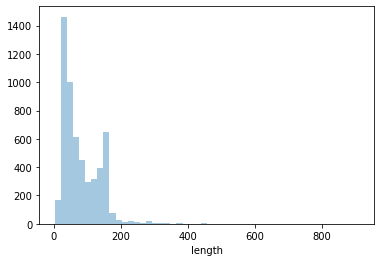

In [9]:
sns.distplot(df['length'],kde=False)

In [0]:
#Text Processing

# 1.Remove punchuation
# 2.Remove stopwords

In [0]:
import string

In [0]:
def message_cleaning(message):
    
    chars = [char for char in message if char not in string.punctuation]
    message = ''.join(chars)
    
    return [word for word in message.split() if word.lower() not in stopwords.words('english')]





In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:

count_vectorizer = CountVectorizer(analyzer=message_cleaning).fit(df['message'])


In [15]:
print(len(count_vectorizer.vocabulary_))

11304


In [16]:
sms = df['message'][10]
print(sms)

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


In [17]:
bag_of_words = count_vectorizer.transform([sms])
print(bag_of_words)
print(bag_of_words.shape)

  (0, 2310)	1
  (0, 2352)	1
  (0, 4622)	1
  (0, 5699)	1
  (0, 6038)	1
  (0, 6232)	1
  (0, 6799)	1
  (0, 7065)	1
  (0, 7461)	1
  (0, 9820)	1
  (0, 10041)	1
  (0, 10191)	1
  (0, 10410)	1
  (0, 10442)	1
  (0, 10825)	1
(1, 11304)


In [18]:
print(count_vectorizer.get_feature_names()[2310])

Im


In [0]:
bag_of_words_list = count_vectorizer.transform(df['message'])

In [20]:
print('Sparse Matrix Shape: ', bag_of_words_list.shape)

Sparse Matrix Shape:  (5572, 11304)


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(bag_of_words_list)
# get the tfidf normalization for a particular document
tfidf_bag_of_words = tfidf_transform.transform(bag_of_words)
print(tfidf_bag_of_words)

  (0, 10825)	0.1995528947233267
  (0, 10442)	0.24772495138197764
  (0, 10410)	0.21597624914658164
  (0, 10191)	0.2617662368830116
  (0, 10041)	0.2596149773504602
  (0, 9820)	0.2485340029632961
  (0, 7461)	0.2842895981240587
  (0, 7065)	0.20204150918447764
  (0, 6799)	0.24693047810268395
  (0, 6232)	0.27445073613078785
  (0, 6038)	0.19237365738904946
  (0, 5699)	0.3938542861889126
  (0, 4622)	0.3275363941999925
  (0, 2352)	0.25857746891569516
  (0, 2310)	0.17396599159763879


In [27]:
tfidf_bag_of_words = tfidf_transform.transform(bag_of_words_list)
print(tfidf_bag_of_words.shape)

(5572, 11304)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_bag_of_words,df['label'], test_size=0.33, random_state=42)

In [0]:
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(X_train,y_train)

In [0]:
predictions=spam_model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
confusion_matrix(y_test,predictions)

array([[1587,    0],
       [  85,  167]])

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1587
        spam       1.00      0.66      0.80       252

    accuracy                           0.95      1839
   macro avg       0.97      0.83      0.89      1839
weighted avg       0.96      0.95      0.95      1839

